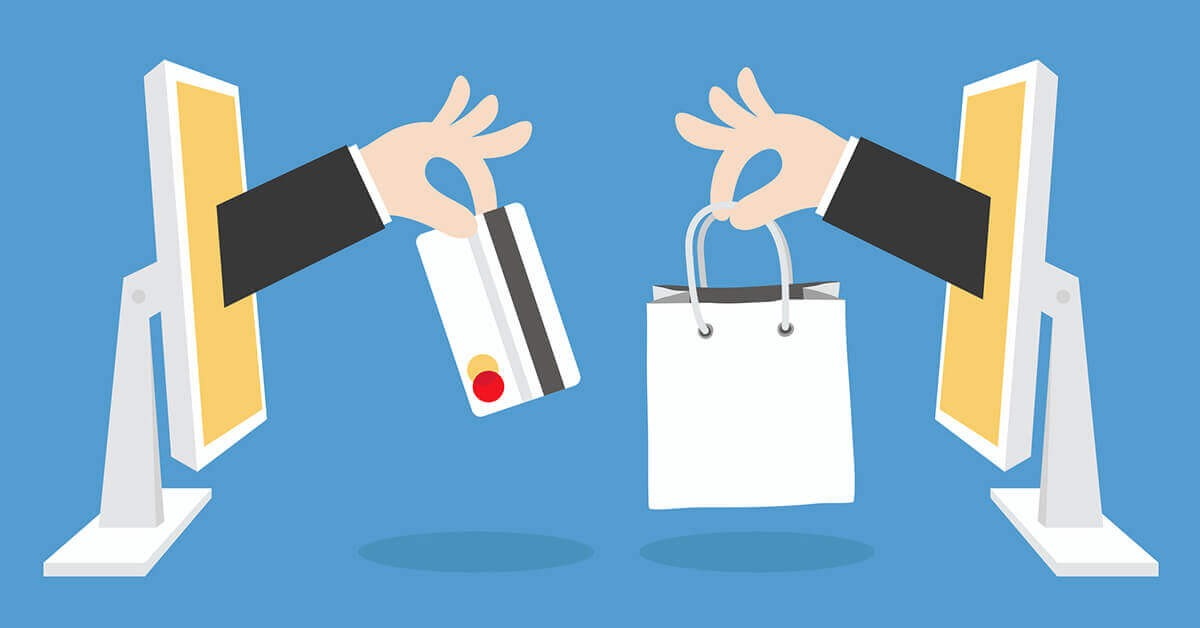

# **Online Retail Project - Exploratory Data Analysis (EDA)**
## **Overview**
This project aims to analyze online retail data to evaluate sales performance, conduct customer segmentation, and examine sales trends by product categories. The dataset includes invoice details, product information, customer IDs, and country-based sales data provided by an online retail company.

## **Dataset**
- **Source**: The Online Retail Project dataset contains invoice, customer, and product information related to retail sales.
- **Columns**: The dataset includes various details such as Invoice No (`InvoiceNo`), Product Code (`StockCode`), Description (`Description`), Quantity (`Quantity`), Unit Price (`UnitPrice`), Customer ID (`CustomerID`), and Country (`Country`).
- **Scope**: The data offers a broad range of sales information, including various discounts, payment methods, and shipping providers.

## **Project Goals**
- **Sales Performance**: Analyzing sales by country and product categories.
- **Customer Behavior**: Examining purchasing patterns through customer segmentation.
- **Product Trends**: Identifying best-selling products and categories.
- **Price and Discount Impact**: Assessing the effect of discounts on sales.

## **Analysis Methods**
- **Exploratory Data Analysis (EDA)**: Cleaning the data, correcting missing values, and performing basic statistical analysis.
- **Visualization**: Using charts and tables to understand sales trends and showcase performance.
- **Correlation Analysis**: Evaluating relationships between product prices, sales volumes, and customer segments.

## **Expected Outcomes**
The analysis is expected to provide insights into the distribution of online retail sales by country, identify customer segments, and reveal sales performance by product categories.

## Step 1: Import Libraries, Loading the Dataset and Initial Exploration


## 1.1 Import Libraries

In [121]:
import numpy as np  # Used for numerical calculations and data manipulation.

import pandas as pd  # Used for data analysis and handling data structures (DataFrame, Series).

import matplotlib.pyplot as plt  # Basic library for 2D plotting and data visualization.

import seaborn as sns  # Used for statistical data visualization. It is built on top of Matplotlib.

import missingno as msno  # Used for visualizing and analyzing missing data.

import plotly.express as px  # Used for interactive graphs and data visualization.

import folium  # Used for map-based visualization (geospatial data).

from folium import plugins  # Provides extra map plugins and features for Folium.

from skimpy import skim  # Used for quickly summarizing and inspecting data.

plt.rcParams["figure.figsize"] = (6,4)  # Sets the default size for the plots.

import warnings  # Used to control and manage warning messages.

warnings.filterwarnings("ignore")  # Ignores warning messages.

warnings.warn("this will not show")  # An example warning message, but it will be suppressed by the ignore filter.

pd.set_option('display.max_columns', None)  # Ensures all columns are displayed on the screen.

pd.set_option('display.max_rows', None)  # Ensures all rows are displayed on the screen.

from matplotlib.colors import LinearSegmentedColormap  # Used to create color maps for data visualizations.


## 1.2 Load the Dataset 

In [122]:
# Load the dataset
df_original = pd.read_csv("online_retail_dataset.csv")


## 1.3 Copy Data Set

In [123]:
df = df_original.copy()

## 1.4 Display First few Rows 

In [124]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


## 1.5 Check the structure of the dataset.

In [125]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 49782  │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 17     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA    ┃ NA %  ┃ mean    ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ InvoiceNo      │     0 │     0 │  550700 │  260700 │  100000 │ 324500 │ 552200 │ 776400 │ 1000000 │ ▇▇▇▇▇▇ │  │
│ │ Quantity       │     0 │     0 │   22.37 │   17.92 │     -50 │     11 │     23 │     37 │      49 │    ▇▇▇ │  │
│ │ UnitPrice      │     0 │     0 │   47.54 │   33.48 │  -99.98 │  23.59 │  48.92 │  74.61 │     100 │    ▇▇▇ │  │
│ │ CustomerID     │  4978 │    10 │   55030 │   25910 │   10000 │  32750 │  55160 │  77310 │  100000 │ ▇▇▇▇▇▇ │  │
│ │ Discount       │     0 │     0 │  0.2757 │  0.2301 │       0 │   0.13 │   0.26 │   0.38 │       2 │   ▇▃   │  │
│ │ ShippingCost   │  2489 │     5 │   17.49 │   7.221 │       5 │  11.22 │   17.5 │  23.72 │      30 │ ▇▇▇▇▇▇ │  │
│ └────────────────┴───────┴───────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ StockCode                        │         0 │         0 │                        1 │                49782 │  │
│ │ Description                      │         0 │         0 │                      1.6 │                81539 │  │
│ │ InvoiceDate                      │         0 │         0 │                        2 │                99564 │  │
│ │ Country                          │         0 │         0 │                      1.2 │                58020 │  │
│ │ PaymentMethod                    │         0 │         0 │                      1.7 │                83059 │  │
│ │ Category                         │         0 │         0 │                        1 │                49782 │  │
│ │ SalesChannel                     │         0 │         0 │                        1 │                49782 │  │
│ │ ReturnStatus                     │         0 │         0 │                      1.9 │                94670 │  │
│ │ ShipmentProvider                 │         0 │         0 │                      1.2 │                62205 │  │
│ │ WarehouseLocation                │      3485 │         7 │                     0.93 │                46297 │  │
│ │ OrderPriority                    │         0 │      

## 1.6 Inspect the data types and missing values using df.info()

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

## 1.7  Visualization of missing values in a data set

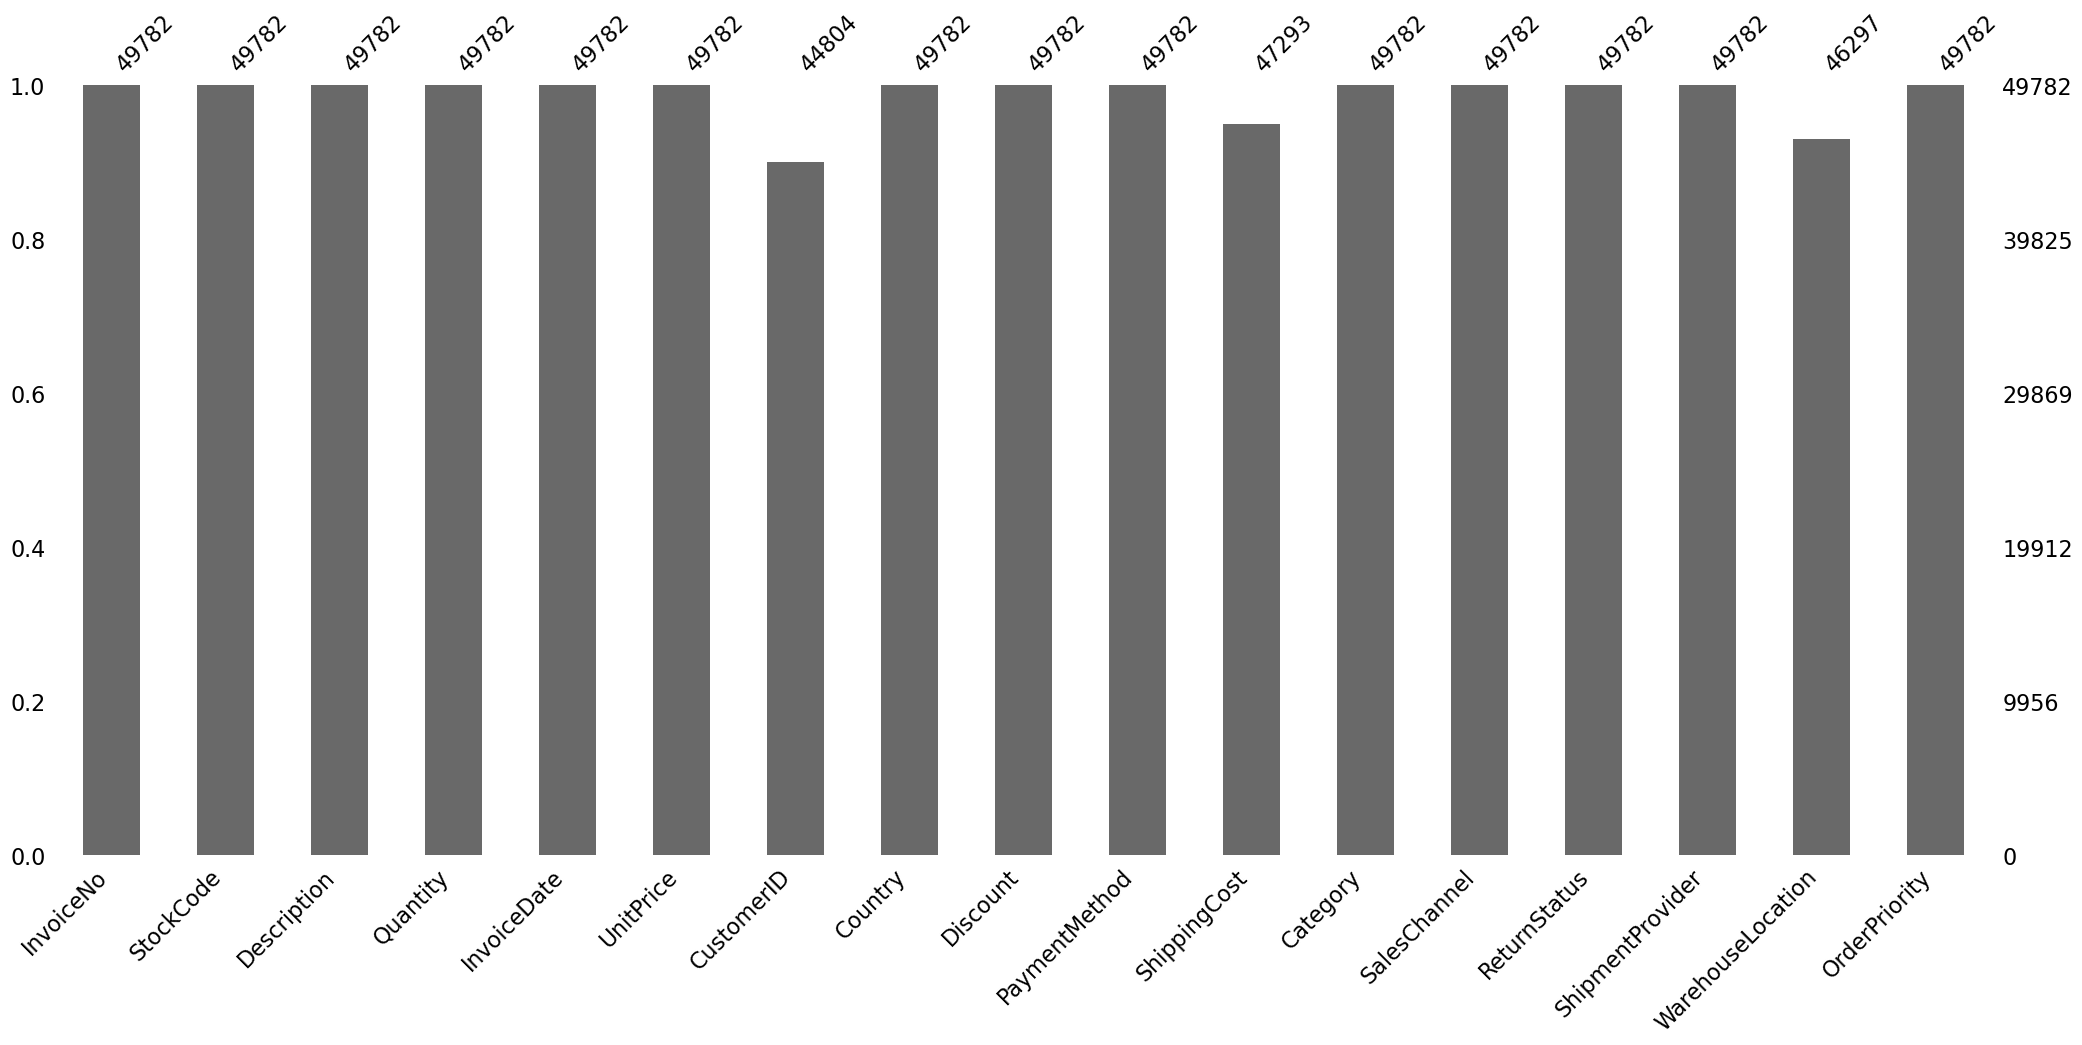

In [128]:
msno.bar(df);

## 1.7 Get basic statistics for numerical columns with df.describe()

In [129]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,49782.0,550681.239946,260703.009944,100005.00,324543.0000,552244.00,776364.00,999997.000000
Quantity,49782.0,22.372343,17.917774,-50.00,11.0000,23.00,37.00,49.000000
UnitPrice,49782.0,47.537862,33.479510,-99.98,23.5925,48.92,74.61,100.000000
CustomerID,44804.0,55032.871775,25913.660157,10001.00,32750.7500,55165.00,77306.25,99998.000000
Discount,49782.0,0.275748,0.230077,0.00,0.1300,0.26,0.38,1.999764
ShippingCost,47293.0,17.494529,7.220557,5.00,11.2200,17.50,23.72,30.000000


## Step 2: Cleaning Inconsistent and Invalid Data

In [130]:
# Fixing inconsistent values in 'UnitPrice'

# Cleaning up negative or unrealistic values in 'Quantity'

# Standardizing the 'PaymentMethod' column

# and more

### 2.1 Fixing inconsistent values in 'UnitPrice'
Data genel yapısını inceledik ve UnitPrice sütununda tutarsız(negatif) değerlerin olduğunu gözlemledik.

In [131]:
# We observed that there are 1,493 negative values in the column by applying the following condition.
df[df["UnitPrice"] < 0]["UnitPrice"].count()

1493

In [132]:
df["UnitPrice"] = df["UnitPrice"].abs() 

In [133]:
df[df["UnitPrice"] < 0]["UnitPrice"].count()

0

### 2.2 Cleaning up negative or unrealistic values in 'Quantity'

In [134]:
#We observed that there are 2,489 negative values in the column by applying the following condition.
df[df["Quantity"] < 0]["Quantity"].count()

2489

In [135]:
# We transformed the negative values in `UnitPrice` to positive by using the `abs()` function.
df["Quantity"] = df["Quantity"].abs() 

In [136]:
df[df["Quantity"] < 0]["Quantity"].count()

0

In [137]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 49782  │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 17     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA    ┃ NA %  ┃ mean    ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ InvoiceNo      │     0 │     0 │  550700 │  260700 │  100000 │ 324500 │ 552200 │ 776400 │ 1000000 │ ▇▇▇▇▇▇ │  │
│ │ Quantity       │     0 │     0 │   24.93 │   14.15 │       1 │     13 │     25 │     37 │      50 │ ▇▇▇▇▇▇ │  │
│ │ UnitPrice      │     0 │     0 │   50.63 │    28.6 │       1 │  25.86 │  50.55 │  75.37 │     100 │ ▇▇▇▇▇▇ │  │
│ │ CustomerID     │  4978 │    10 │   55030 │   25910 │   10000 │  32750 │  55160 │  77310 │  100000 │ ▇▇▇▇▇▇ │  │
│ │ Discount       │     0 │     0 │  0.2757 │  0.2301 │       0 │   0.13 │   0.26 │   0.38 │       2 │   ▇▃   │  │
│ │ ShippingCost   │  2489 │     5 │   17.49 │   7.221 │       5 │  11.22 │   17.5 │  23.72 │      30 │ ▇▇▇▇▇▇ │  │
│ └────────────────┴───────┴───────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ StockCode                        │         0 │         0 │                        1 │                49782 │  │
│ │ Description                      │         0 │         0 │                      1.6 │                81539 │  │
│ │ InvoiceDate                      │         0 │         0 │                        2 │                99564 │  │
│ │ Country                          │         0 │         0 │                      1.2 │                58020 │  │
│ │ PaymentMethod                    │         0 │         0 │                      1.7 │                83059 │  │
│ │ Category                         │         0 │         0 │                        1 │                49782 │  │
│ │ SalesChannel                     │         0 │         0 │                        1 │                49782 │  │
│ │ ReturnStatus                     │         0 │         0 │                      1.9 │                94670 │  │
│ │ ShipmentProvider                 │         0 │         0 │                      1.2 │                62205 │  │
│ │ WarehouseLocation                │      3485 │         7 │                     0.93 │                46297 │  │
│ │ OrderPriority                    │         0 │      

### 2.3 Standardizing the 'PaymentMethod' column


In [138]:
# We identified the payment methods in "PaymentMethod."
df["PaymentMethod"].value_counts()

PaymentMethod
Bank Transfer    16747
Credit Card      16530
paypall          16505
Name: count, dtype: int64

In [139]:
# We updated the "paypall" payment method to "Paypall" in "PaymentMethod
df["PaymentMethod"].replace("paypall", "Paypall", inplace=True)

In [140]:

df["PaymentMethod"].value_counts()

PaymentMethod
Bank Transfer    16747
Credit Card      16530
Paypall          16505
Name: count, dtype: int64

### 2.4 Standardizing the 'StockCode' column
'StockCode' sütununda fazlalık olarak görülen 'SKU_' kısmını çıkardık. Veri türünü integer e çevirdik.     
Böylelikle kodu daha okunur hale getirdik.

In [141]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium


In [142]:
df["StockCode"] = df["StockCode"].str.lstrip("SKU_").astype("int")

In [143]:
#We observed that the data type has changed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  int32  
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

### 2.5 Standardizing the 'CustomerID' column
'CustomerID' sütununda NaN değerlerin 'Unknown' olarak doldurduk ve ID lerin sonundaki fazlalık olan '.0' değerini kaldırdık.

In [144]:
df["CustomerID"].head(5)

0    37039.0
1    19144.0
2    50472.0
3    96586.0
4        NaN
Name: CustomerID, dtype: float64

In [145]:
#We converted the Nan values ​​in the 'CustomerID' column to 'Object' data type to make them 'Unknow'. Here we make a direct integer and
# We tried removing '.0' values. It gave an error due to NaN values.
df["CustomerID"] = df["CustomerID"].astype("object")

In [146]:
# We filled in NaN values.
df["CustomerID"].fillna("Unknown", inplace=True)

In [147]:
# We changed the data type to 'str' to delete the redundant value '.0' in this line. Since the '.0' value is not deleted once, each character
# we deleted separately.
df["CustomerID"] = df["CustomerID"].astype("str").str.rstrip("0").str.rstrip(".")

In [148]:
df["CustomerID"].head(5)

0      37039
1      19144
2      50472
3      96586
4    Unknown
Name: CustomerID, dtype: object

### 2.6 Standardizing the 'Discount' column
"Discount" Sütunundaki noktadan sonraki fazla sayıları yuvarladık.

In [149]:
df["Discount"].head()

0    0.470000
1    0.190000
2    0.350000
3    0.140000
4    1.501433
Name: Discount, dtype: float64

In [150]:
# We arranged it to have 2 digits after the dot with the 'Round' parameter.
df["Discount"] = df["Discount"].round(2)

In [151]:
df["Discount"].head()

0    0.47
1    0.19
2    0.35
3    0.14
4    1.50
Name: Discount, dtype: float64

## Step 3: Analyzing and Handling Missing Values

In [152]:
# Checking for missing values

# Fill missing values with your strategy

### 3.1 Detection and filling of missing values(ShippingCost)                                                  
**TR:** "ShippingCost" sütununun diğer sütunlarla anlamlı bir ilişkisi olmadığını tespit ettik. Bu nedenle, "ShippingCost" sütununu ortalama değeri ile doldurmanın en uygun yöntem olacağına karar verdik. Kararımızı, "Country", "ShipmentProvider" ve "WarehouseLocation" sütunlarını "ShippingCost" sütununa göre gruplayarak bu grupların ortalama değerlerinin genel "ShippingCost" ortalamasına yakın olduğunu gözlemleyerek destekledik.   

**EN:** We found that the “ShippingCost” column has no significant relationship with the other columns. Therefore, we decided that it would be most appropriate to fill the “ShippingCost” column with its average value. We supported our decision by grouping the “Country”, “ShipmentProvider” and “WarehouseLocation” columns according to the “ShippingCost” column and observing that the average values of these groups are close to the overall “ShippingCost” average.  


In [153]:
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID              0
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

In [154]:
# “ShippingCost” column average value calculation
df["ShippingCost"].mean()

17.49452921151122

In [155]:
# Calculate “ShippingCost” average value based on “Country” column
df.groupby("Country")["ShippingCost"].mean().mean()


17.49455195055477

In [156]:
# Calculate “ShippingCost” average value based on "ShipmentProvider" column
df.groupby("ShipmentProvider")["ShippingCost"].mean().mean()

17.494364720265526

In [157]:
# Calculate “ShippingCost” average value based on "WarehouseLocation" column
df.groupby("WarehouseLocation")["ShippingCost"].mean().mean()

17.48266955767786

In [158]:
# Filling the “ShippingCost” column NaN values.
df["ShippingCost"].fillna(17.49, inplace=True)

In [159]:
# We checked that the NaN values of the “ShippingCost” column are filled.
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID              0
Country                 0
Discount                0
PaymentMethod           0
ShippingCost            0
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

### 3.1 Detection and filling of missing values(WarehouseLocation)
**TR** 'WarehouseLocation' sütununun Nal değerlerini doldurmak için diğer sütunlar ile bir ilişki olup olmadığını kontrol ettik. Herhangi bir ilişki bulamadık. Bu yüzden Nan değerleri ramdom doldurmayı uygun bulduk.

**EN** To fill the Nal values of the 'WarehouseLocation' column, we checked if there is a relationship with the other columns. We did not find any relationship, so we found it appropriate to fill the Nan values randomly.



In [160]:
# Detection of NaN values in “WarehouseLocation” Column
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID              0
Country                 0
Discount                0
PaymentMethod           0
ShippingCost            0
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

In [161]:
# Checking the current values.

df["WarehouseLocation"].value_counts()

WarehouseLocation
Amsterdam    9458
London       9230
Rome         9226
Berlin       9210
Paris        9173
Name: count, dtype: int64

In [162]:
# We've brought the unique version except for NaN.
warehouse_locations = df['WarehouseLocation'].dropna().unique()
warehouse_locations

array(['London', 'Rome', 'Berlin', 'Amsterdam', 'Paris'], dtype=object)

In [163]:
# Fills the NaN values in the 'WarehouseLocation' cell by randomly selecting from the values in Warehouse_locations.
df['WarehouseLocation'] =  df['WarehouseLocation'].apply(lambda x: np.random.choice(warehouse_locations) if pd.isna(x) else x)

In [164]:
# Latest status after filling
df["WarehouseLocation"].value_counts()

WarehouseLocation
Amsterdam    10172
London        9953
Rome          9937
Berlin        9915
Paris         9805
Name: count, dtype: int64

In [165]:
# We checked that the NaN values are full.
df.isnull().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
Discount             0
PaymentMethod        0
ShippingCost         0
Category             0
SalesChannel         0
ReturnStatus         0
ShipmentProvider     0
WarehouseLocation    0
OrderPriority        0
dtype: int64

In [166]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,49782.0,550681.239946,260703.009944,100005.0,324543.0000,552244.000,776364.00,999997.0
StockCode,49782.0,1497.690029,288.660958,1000.0,1248.0000,1495.000,1748.00,1999.0
Quantity,49782.0,24.925555,14.152125,1.0,13.0000,25.000,37.00,50.0
UnitPrice,49782.0,50.625031,28.597658,1.0,25.8625,50.555,75.37,100.0
Discount,49782.0,0.275750,0.230086,0.0,0.1300,0.260,0.38,2.0
ShippingCost,49782.0,17.494303,7.037732,5.0,11.5400,17.490,23.41,30.0


## Step 4: Detecting and Handling Outliers

In [167]:
# Boxplot for outlier detection                
# Example: Removing outliers
# df = df[df['UnitPrice'] < df['UnitPrice'].quantile(0.99)]

### 4.1 Detecting and Handling Outliers in 'Quantity'
**EN:** We saw that there is no utliner value in the “Quantity” column

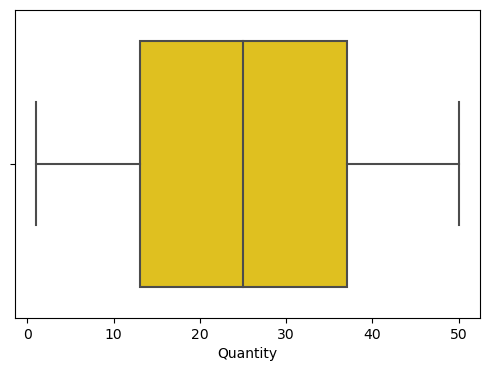

In [168]:

sns.boxplot(data = df, x = "Quantity", color="#ffd600" );

### 4.2 Detecting and Handling Outliers in 'UnitPrice'
**TR:** "UnitPrice" sütununda utliner değerin olmadığını gördük                        
**EN:** We saw that there is no utliner value in the “UnitPrice” column

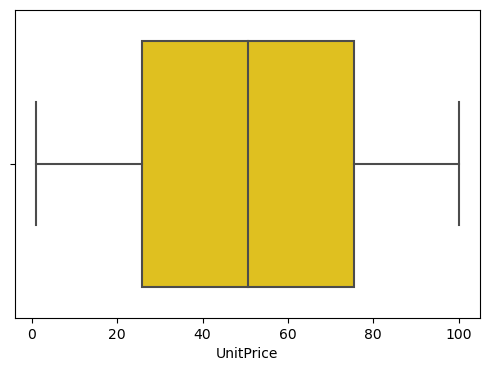

In [169]:
sns.boxplot(data = df, x = "UnitPrice", color="#ffd600");

### 4.3 Detecting and Handling Outliers in 'Discount'
**EN:** In the “Discount” column we saw that the utliner value is there.

In [170]:
# See the number of outliner values.
df[df["Discount"] > 0.755]["Discount"].count()

996

In [171]:
# Finding Q1, Q2, Q3.
Q1=df["Discount"].quantile(0.25)
Q2=df["Discount"].quantile(0.50)
Q3=df["Discount"].quantile(0.75)
print(f"Q1={Q1}, Q2={Q2}, Q3={Q3}")

Q1=0.13, Q2=0.26, Q3=0.38


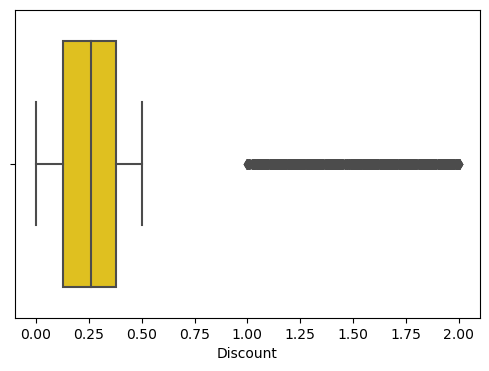

In [172]:
# Finding IQR, MIN, MAX values and visualizing outlier values with boxplot.
# Q1=0.13,Q2=0.26,Q3=0.38
# IQR= Q3-Q1 -->  0.38- 0.13= 0.25
# MİN= Q1-(1.5 * IQR) --> 0.13-(1.5 * 0.25) = - 0,245
# MAX= Q3+(1.5 * IQR) --> 0.38+(1.5 * 0.25) = 0,755
sns.boxplot(data = df, x = "Discount", color="#ffd600");

In [173]:
# With reference to the MAX value, we took all values below 0.755 and removed all outlier values.

df = df[df["Discount"] <= 0.755]

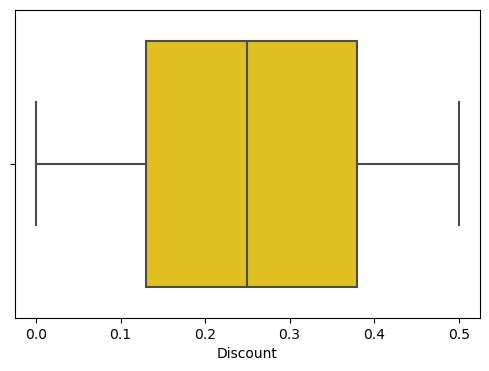

In [174]:
# Here we have seen that auliner values have been deleted.
sns.boxplot(data = df, x = "Discount", color="#ffd600");

### 4.4 Detecting and Handling Outliers in 'ShippingCost'
**EN:** We saw that there is no utliner value in the “ShippingCost” column

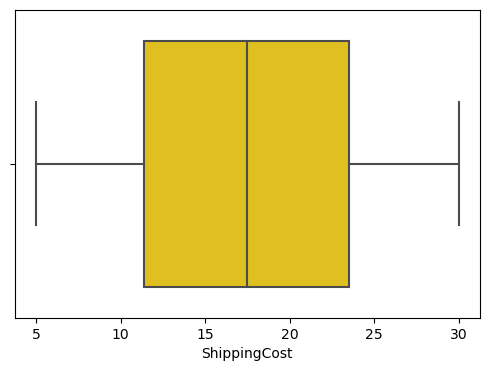

In [175]:
sns.boxplot(data = df, x = "ShippingCost", color="#ffd600");

## Step 5: Feature Engineering

In [176]:
# Create new feature 'TotalCost'

# Extracting Day of the Week from 'InvoiceDate'

# Extracting Month from 'InvoiceDate'

In [177]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,1964,White Mug,38,2020-01-01 00:00,1.71,37039,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,1241,White Mug,18,2020-01-01 01:00,41.25,19144,Spain,0.19,Paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,1501,Headphones,49,2020-01-01 02:00,29.11,50472,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586,Netherlands,0.14,Paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
5,744167,1006,Office Chair,47,2020-01-01 05:00,70.16,53887,Sweden,0.48,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium


### 5.1 Create new feature 'TotalCost'

In [178]:
# We calculated the total cost.
df["TotalCost"] = ((df["Quantity"] * df["UnitPrice"]) - ((df["Quantity"] * df["UnitPrice"]) * 
                  df["Discount"]) + df["ShippingCost"]).round(2)

In [179]:
df.sample(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,TotalCost
32220,627956,1741,Wireless Mouse,45,2023-09-04 12:00,61.57,25057,Germany,0.05,Paypall,5.02,Electronics,Online,Not Returned,FedEx,Paris,High,2637.14


### 5.2  Separate year, month, day and hour from 'InvoiceDate' column
**EN=** Place the data in the 'InvoiceDate' column into separate columns.

In [180]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,TotalCost
0,221958,1964,White Mug,38,2020-01-01 00:00,1.71,37039,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,45.23


In [181]:
# We converted the 'InvoiceDate' column to date format.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48786 entries, 0 to 49781
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceNo          48786 non-null  int64         
 1   StockCode          48786 non-null  int32         
 2   Description        48786 non-null  object        
 3   Quantity           48786 non-null  int64         
 4   InvoiceDate        48786 non-null  datetime64[ns]
 5   UnitPrice          48786 non-null  float64       
 6   CustomerID         48786 non-null  object        
 7   Country            48786 non-null  object        
 8   Discount           48786 non-null  float64       
 9   PaymentMethod      48786 non-null  object        
 10  ShippingCost       48786 non-null  float64       
 11  Category           48786 non-null  object        
 12  SalesChannel       48786 non-null  object        
 13  ReturnStatus       48786 non-null  object        
 14  ShipmentPro

In [183]:
# We created a column named “InvoiceYear”.
df["InvoiceYear"] = df['InvoiceDate'].dt.year

In [184]:
# We created a column named “InvoiceYear”.
df["InvoiceMonth"] = df['InvoiceDate'].dt.month

In [185]:
# We created a column named “InvoiceDay”.
df["InvoiceDay"] = df['InvoiceDate'].dt.day

In [186]:
# We created a column named “InvoiceTime”.
df["InvoiceTime"] = df['InvoiceDate'].dt.time

In [187]:
# Year, Month. We deleted the 'InvoiceDate' column because we added columns based on Day and Time.
df = df.drop('InvoiceDate', axis=1)

In [188]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,TotalCost,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceTime
0,221958,1964,White Mug,38,1.71,37039,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,45.23,2020,1,1,00:00:00


### 5.3  Correction of incorrect Category Column



In [189]:
# Correction of incorrect Category Column

In [190]:
# We saw the mistakes in the Category Sutun.

df.groupby(["Category","Description"]).size()

Category     Description   
Accessories  Backpack          904
             Blue Pen          864
             Desk Lamp         877
             Headphones        859
             Notebook          911
             Office Chair      902
             T-shirt           852
             USB Cable         883
             Wall Clock        925
             White Mug         919
             Wireless Mouse    877
Apparel      Backpack          864
             Blue Pen          895
             Desk Lamp         898
             Headphones        907
             Notebook          835
             Office Chair      878
             T-shirt           899
             USB Cable         911
             Wall Clock        895
             White Mug         841
             Wireless Mouse    861
Electronics  Backpack          878
             Blue Pen          876
             Desk Lamp         894
             Headphones        894
             Notebook          852
             Office Chair  

In [191]:
# We made a correct grouping for the Category column.
Category = {
    'Backpack': 'Accessory',  
    'Blue Pen': 'Stationer',
    'Notebook': 'Stationer',
    'Office Chair': 'Furniture',
    'Wall Clock': 'Accessory',
    'White Mug': 'Accessory',
    'Wireless Mouse': 'Electronics',
    'USB Cable': 'Electronics',
    'Headphones': 'Electronics',
    'T-shirt': 'Apparel',
    'Desk Lamp':'Accessory'
}

In [192]:
# We updated the “Category” column with the grouping we made.
df['Category'] = df['Description'].map(Category)

In [193]:
# We have seen the Category column recovering.
df.groupby(["Category","Description"]).size()

Category     Description   
Accessory    Backpack          4480
             Desk Lamp         4456
             Wall Clock        4501
             White Mug         4451
Apparel      T-shirt           4381
Electronics  Headphones        4450
             USB Cable         4502
             Wireless Mouse    4354
Furniture    Office Chair      4431
Stationer    Blue Pen          4417
             Notebook          4363
dtype: int64

## Step 6: Data Visualization

### 6.1  Sales Distribution by Country
**TR** Ülkelere göre toplam satış hacimlerinin görselleştirilmesini gerçekleştirdik.                        
**EN** We visualized total sales volumes by country.

In [194]:
# Bar chart for total sales by country

In [195]:
#We made a country-based total sales volume calculation.
total_cost_by_country = df.groupby("Country")[["TotalCost"]].sum().sort_values("TotalCost", ascending = False ).reset_index()
total_cost_by_country

,Country,TotalCost
0,Belgium,4039735.26
1,Sweden,3986722.16
2,United Kingdom,3985433.67
3,United States,3958837.41
4,Germany,3946976.16
5,France,3920133.19
6,Portugal,3903108.64
7,Spain,3878873.43
8,Norway,3877461.99
9,Italy,3851780.50


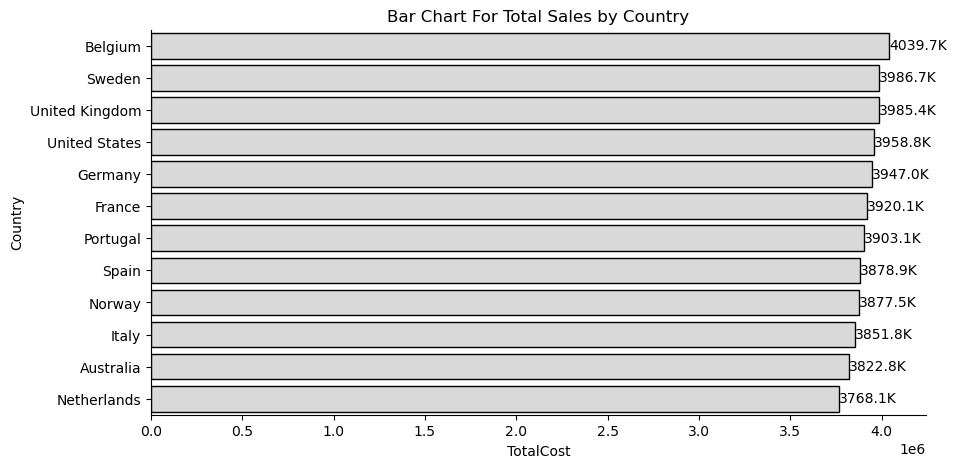

In [196]:
# We made a visualization in the bar chart using the “total_cost_by_country” data we created above.
paletta = sns.light_palette("seagreen", n_colors=6)
plt.figure(figsize=(10,5))
ax = sns.barplot(data = total_cost_by_country, x = "TotalCost", y ="Country", ci = None, color="#d9d9d9" )
plt.title("Bar Chart For Total Sales by Country")

for p in ax.patches:
        p.set_color('#D9D9D9') 
        p.set_linewidth(1)      
        p.set_edgecolor('black') 

for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-3:.1f}K', 
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')
    plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


### 6.2 Payment Method Usage
**TR:** Pie Chart ile ödeme metodlarının görselleştirilmesi.               
**EN:** Visualization of payment methods with Pie Chart.


In [197]:
# Pie chart for payment methods


In [198]:
# We have identified the total number of payment methods.
payment_Method = df["PaymentMethod"].value_counts()
payment_Method

PaymentMethod
Bank Transfer    16439
Credit Card      16214
Paypall          16133
Name: count, dtype: int64

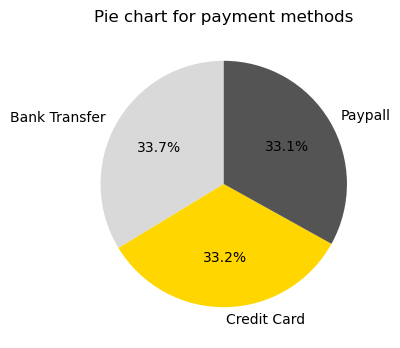

In [199]:
# Using the “pament_method” dataframe we created above, we made a visualization in the pie chart graph.

plt.figure()
plt.pie(payment_Method,
        labels=payment_Method.index,
        autopct='%1.1f%%', 
        startangle=90, 
        colors = ["#d9d9d9", "#ffd600", "#545454"]
       )
plt.title("Pie chart for payment methods");

### 6.3 Seasonal Sales Trends

In [200]:
# Line chart for seasonal trends

In [201]:
# We used dictionary to categorize seasonally.
mevsimler = {
    1: 'Winter',   # Ocak
    2: 'Winter',   # Şubat
    3: 'Spring',   # Mart
    4: 'Spring',   # Nisan
    5: 'Spring',   # Mayıs
    6: 'Summer',   # Haziran
    7: 'Summer',   # Temmuz
    8: 'Summer',   # Ağustos
    9: 'Autumn',   # Eylül
    10: 'Autumn',  # Ekim
    11: 'Autumn',  # Kasım
    12: 'Winter'   # Aralık
}

In [202]:
# Fixed incorrect categorical names with the map function.
df['InvoiceSeason'] = df['InvoiceMonth'].map(mevsimler)


In [203]:
# Created dataframe to be used for visualization.
seasonal_trends = df.groupby("InvoiceSeason")[["TotalCost", "Quantity"]].sum(). reset_index()
seasonal_trends["sorting"] = [3,1,2,4]    
seasonal_trends = seasonal_trends.sort_values(by="sorting")
seasonal_trends

,InvoiceSeason,TotalCost,Quantity,sorting
1,Spring,12459055.37,324128,1
2,Summer,12444403.82,321194,2
0,Autumn,10509981.98,270901,3
3,Winter,11526452.81,299701,4


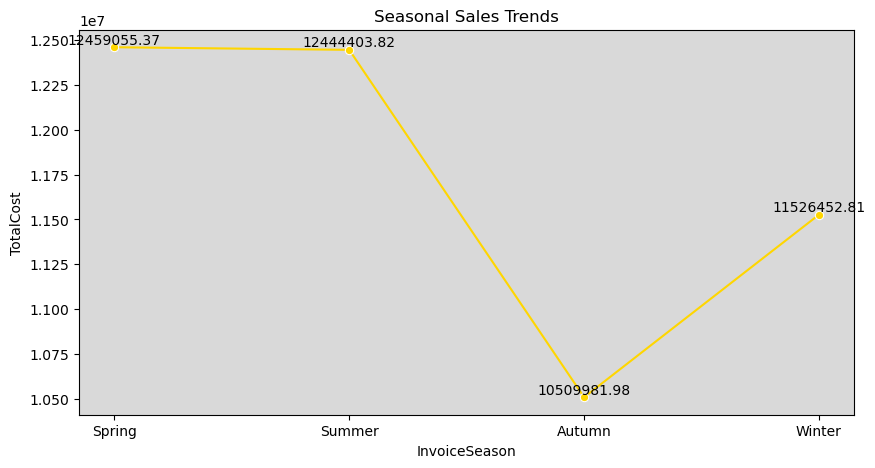

In [204]:
# Data Total cost volumes by seasons visualized in line plot.
plt.figure(figsize=(10,5))
ax = sns.lineplot(data = seasonal_trends, x = "InvoiceSeason", y = "TotalCost", ci=None, marker = 'o', color= "#ffd600" )
ax.set_facecolor("#d9d9d9")
for x, y in zip(seasonal_trends["InvoiceSeason"], seasonal_trends["TotalCost"]):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')
plt.title("Seasonal Sales Trends");

### 6.4 Total sales figures by month in Data

In [205]:
# Total monthly sales listed
InvoiceMonth_Totalcost=df.groupby("InvoiceMonth")["TotalCost"].sum()
InvoiceMonth_Totalcost

InvoiceMonth
1     4200564.45
2     3832852.39
3     4209414.65
4     4091330.47
5     4158310.25
6     4064771.28
7     4134075.00
8     4245557.54
9     3524791.07
10    3549283.46
11    3435907.45
12    3493035.97
Name: TotalCost, dtype: float64

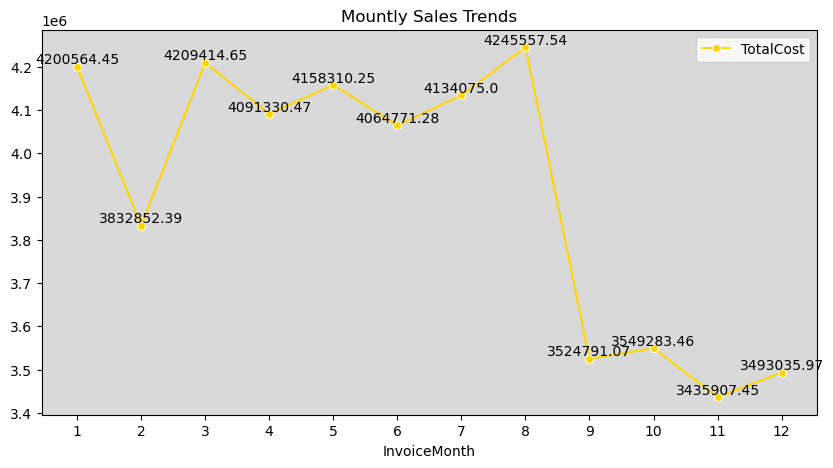

In [206]:
# Overall total sales figures by month were visualized.
plt.figure(figsize=(10,5))
ax=sns.lineplot( x=InvoiceMonth_Totalcost.index, y=InvoiceMonth_Totalcost.values, marker='o',label="TotalCost", color= "#ffd600")
plt.title("Mountly Sales Trends")
ax.set_facecolor("#d9d9d9")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12]);
for x, y in zip(InvoiceMonth_Totalcost.index, InvoiceMonth_Totalcost.values):
    plt.text(x, y, f'{y}',
             ha='center',
             va='bottom')

### 6. 5 Quantity and Total Coast Correlation

In [207]:
# Scatter plot for quantity and total cost


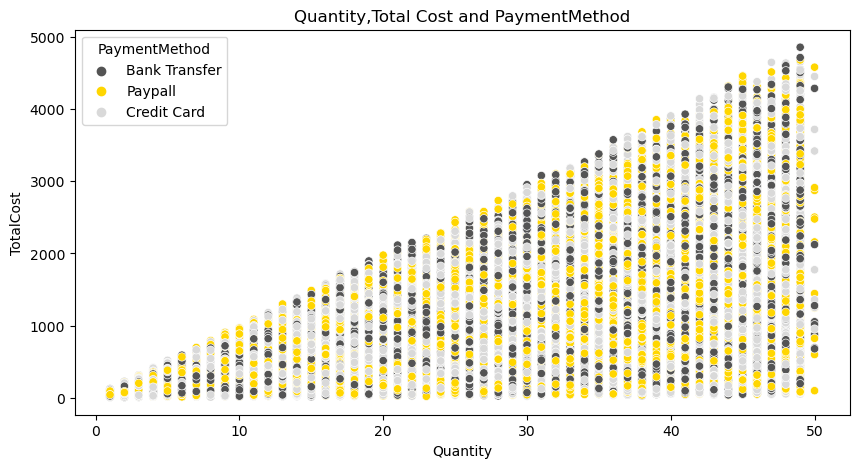

In [208]:
# We have seen the distribution of payment methods depending on Total Cost and Quantity
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x = "Quantity", y = "TotalCost", 
                palette={"#d9d9d9", "#ffd600", "#545454"}, 
                hue = "PaymentMethod")
plt.title("Quantity,Total Cost and PaymentMethod");


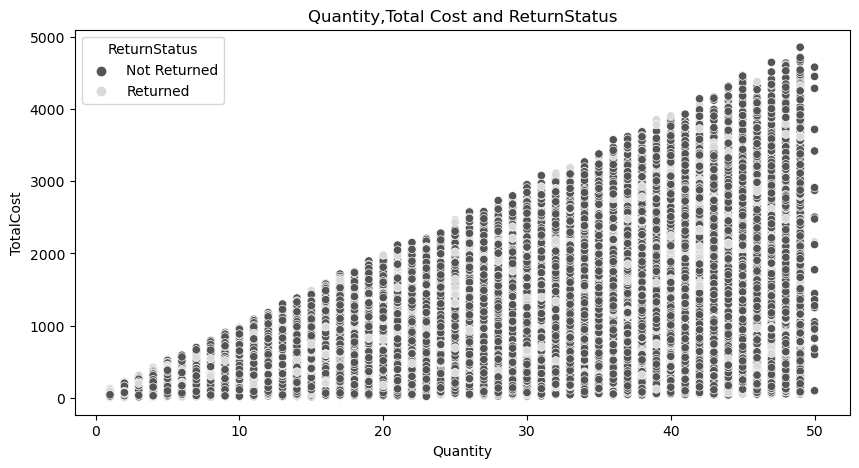

In [209]:
# We have seen the distribution of ReturnStatus depending on Total Cost and Quantity.
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x = "Quantity", y = "TotalCost", 
                palette={"#d9d9d9", "#545454"}, 
                hue = "ReturnStatus")
plt.title("Quantity,Total Cost and ReturnStatus");


### 6.6 ShippingCost and Total Correlation
**EN:** We checked whether there is a correlation between ShippingCost and TotalCost depending on OrderPriority.


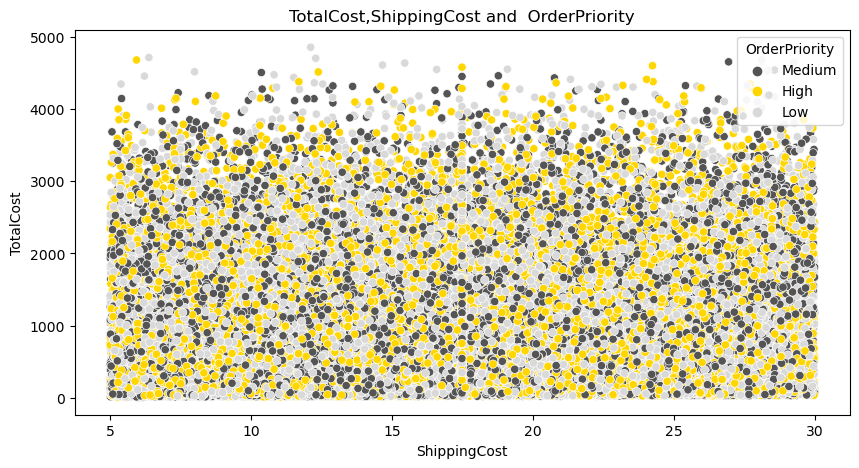

In [210]:

plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x = "ShippingCost", y = "TotalCost", 
                palette={"#d9d9d9", "#ffd600", "#545454"}, 
                hue = "OrderPriority")
plt.title("TotalCost,ShippingCost and  OrderPriority");

**EN:** We checked whether there is a correlation between ShippingCost and Quantity depending on OrderPriority.

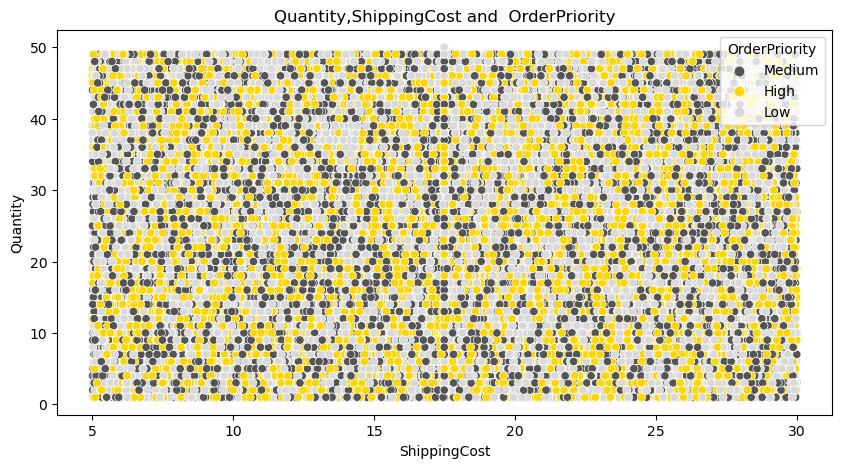

In [211]:
#We have seen the Quantity distribution based on ShippingCost and TotalCost quantities.
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x = "ShippingCost", y = "Quantity", 
                palette={"#d9d9d9", "#ffd600", "#545454"}, 
                hue = "OrderPriority")
plt.title("Quantity,ShippingCost and  OrderPriority");

### 6.7 Shipping Cost Analysis

In [212]:
# Boxplot for shipping cost by shipment provider


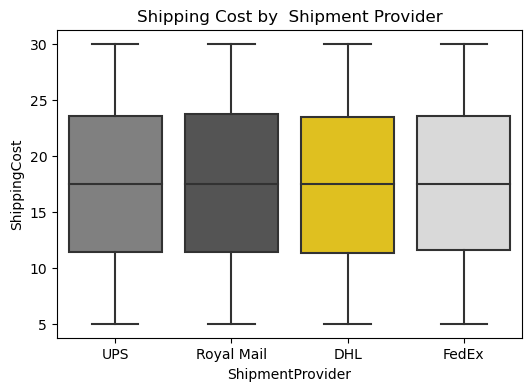

In [213]:

sns.boxplot(data = df, x = "ShipmentProvider", 
            y = "ShippingCost", 
            palette= {"#545454", "#d9d9d9", "#ffd600", "#808080" }
           )
plt.title("Shipping Cost by  Shipment Provider");

### 6.8 Top Performing Products

In [214]:
# List of total sales volume by product
Top_Performing_Products=df.groupby("Description")["TotalCost"].sum().sort_values(ascending=False)
Top_Performing_Products

Description
White Mug         4388500.43
USB Cable         4341416.70
Desk Lamp         4284698.73
Wall Clock        4283150.15
Headphones        4277776.50
Backpack          4276568.39
Blue Pen          4273240.86
Wireless Mouse    4245664.21
Notebook          4201949.24
Office Chair      4192376.91
T-shirt           4174551.86
Name: TotalCost, dtype: float64

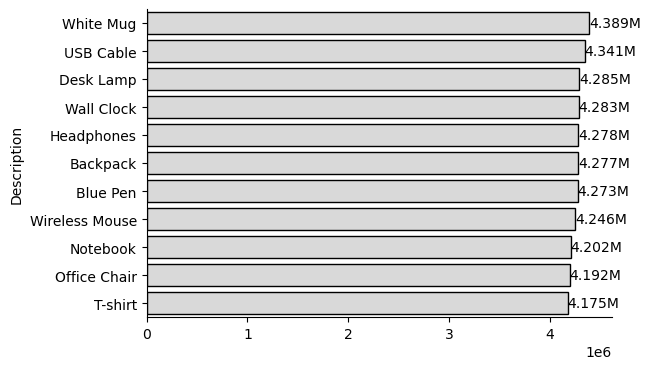

In [215]:
# Chart of total sales quantity to products
plt.figure()
ax=sns.barplot(x=Top_Performing_Products.values,y=Top_Performing_Products.index)
for p in ax.patches:
        p.set_color('#D9D9D9')  # Diğer çubukların rengi
        p.set_linewidth(1)      # Çizgi kalınlığını değiştirme
        p.set_edgecolor('black') # Kenar rengini ayarlama
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-6:.3f}M',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

In [216]:
# Bar chart for top 10 products by revenue
Top_Performing_Products=df["Description"].value_counts()
Top_Performing_Products

Description
USB Cable         4502
Wall Clock        4501
Backpack          4480
Desk Lamp         4456
White Mug         4451
Headphones        4450
Office Chair      4431
Blue Pen          4417
T-shirt           4381
Notebook          4363
Wireless Mouse    4354
Name: count, dtype: int64

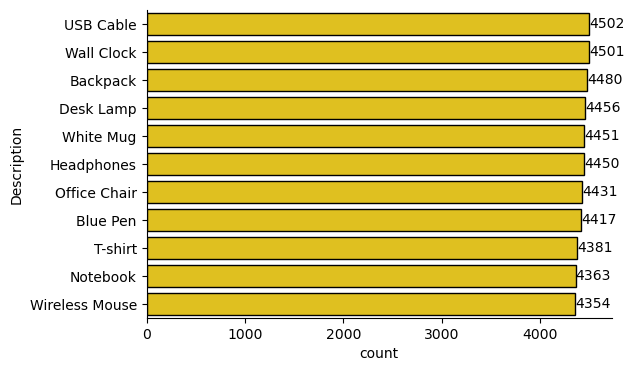

In [217]:
# Total sales figures by product
ax = sns.countplot(data = df, y = "Description", order = Top_Performing_Products.index, color="#ffd600")
for p in ax.patches:
        p.set_edgecolor('black') # Kenar rengini ayarlama
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)

for p in ax.containers:
    ax.bar_label(p);
    

### 6.9 Customer Behavior Analysis
**EN:** In this correlation relationship, there is a positive correlation of 0.63 between Total cost and Quantitiy, that is, there is a positive correlation, that is, when one increases, the other increases. Since the other relationships are very close to zero, we observed that there is no correlation, that is, there is no relationship between them.

In [218]:
# Heatmap for customer spending


In [219]:
# Here we calculated correlation in columns containing numerical values.
corr=df[["Quantity","TotalCost","ShippingCost"]].corr()


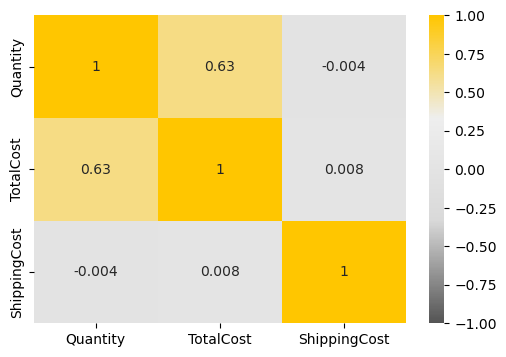

In [220]:
# Visualization with Heatmap

from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list("custom_palette", ["#545454", "#d9d9d9", "#eeeeee", "#ffc600"])

plt.figure()

sns.heatmap(corr, annot=True, cmap=custom_cmap, vmin=-1, vmax=1);

### 6.10 Order Return Analysis
**EN** Displaying returned and non-returned products in the Bar Chart.

In [221]:
# Bar chart for returned vs not returned


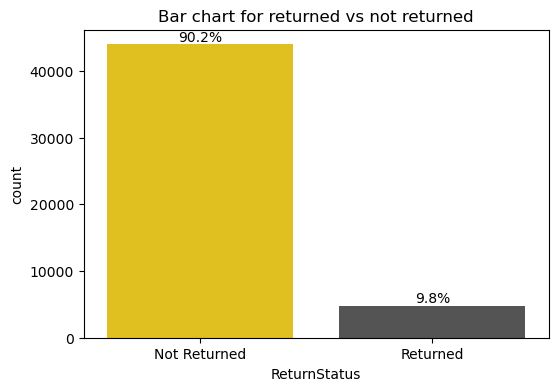

In [222]:
ax=sns.countplot(data=df,x="ReturnStatus",palette={"#545454","#FFD600"})
total = len(df)
plt.title("Bar chart for returned vs not returned")
for p in ax.patches:
    height = p.get_height()  
    percentage = '{:.1f}%'.format(100 * height / total)  
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')  

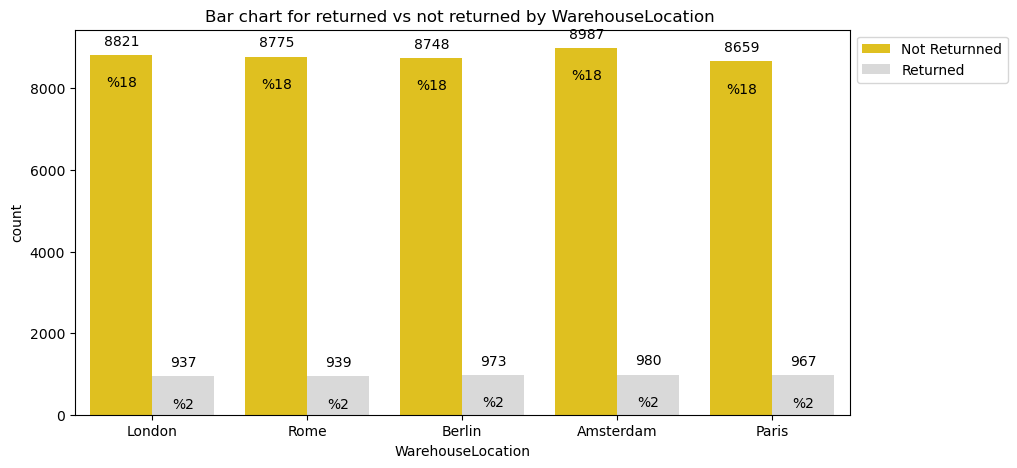

In [223]:
# We visualized the returned and non-returned products according to the warehouse sent in the bar chart.

fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.countplot(data = df, x = "WarehouseLocation", hue = "ReturnStatus", palette={"#FFD600","#D9D9D9"})
total = len(df)


total = len(df)


for p in ax.patches:
    height = p.get_height() 
    
 
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., p.get_height() - 0.5), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    percentage = 100 * height / total
    ax.annotate(f'%{percentage:.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, -20), textcoords='offset points')
    plt.legend(['Not Returnned', 'Returned'], loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Bar chart for returned vs not returned by WarehouseLocation ")

plt.show()

### 6.11 Sales Channel Analysis
**EN** Sales were analyzed according to sales channels.

In [224]:
# Bar chart for sales by channel


In [225]:
# Total values of the SalesChannel column. 
Sales_Channel = df["SalesChannel"].value_counts()
Sales_Channel

SalesChannel
Online      24542
In-store    24244
Name: count, dtype: int64

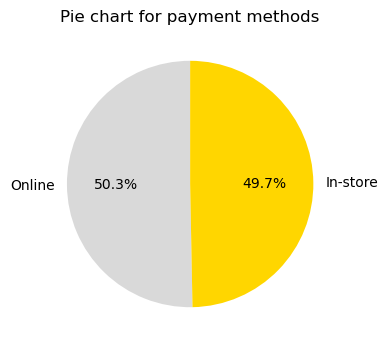

In [226]:
plt.figure()
plt.pie(Sales_Channel,
        labels=Sales_Channel.index,
        autopct='%1.1f%%', 
        startangle=90, 
        colors = ["#d9d9d9", "#ffd600", "#545454"]
       )
plt.title("Pie chart for payment methods");

 ### 6.12 Sales Channel Analysis
 **EN** Realized payment method rates by product category 

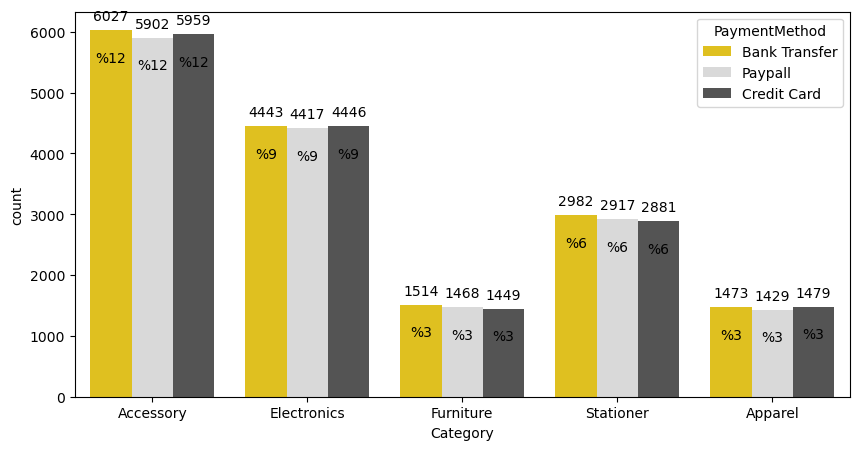

In [227]:
# We visualized the actual payment method rates by product category.
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.countplot(data = df, x = "Category", hue = "PaymentMethod", palette={"#545454","#FFD600","#D9D9D9"})
total = len(df)


total = len(df)


for p in ax.patches:
    height = p.get_height() 
    
 
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., p.get_height() - 0.5), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    percentage = 100 * height / total
    ax.annotate(f'%{percentage:.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, -20), textcoords='offset points')

plt.show()

### 6.13 Top 10 CustomerID by  TotalCost
**EN:** Top 10 Custumer id visualization according to TotalCoast.

In [228]:

top_10_customer_id=df.groupby("CustomerID")["TotalCost"].sum().sort_values(ascending=False).head(11)
top_10_customer_id=pd.DataFrame(top_10_customer_id).reset_index()
top_10_customer_id=top_10_customer_id[top_10_customer_id["CustomerID"] != "Unknown"]
top_10_customer_id

,CustomerID,TotalCost
1,84431,9824.97
2,81067,9741.42
3,81631,8776.23
4,98923,8719.21
5,80001,8599.53
6,76402,8269.63
7,29700,8068.44
8,72172,7913.42
9,52808,7883.90
10,26371,7763.11


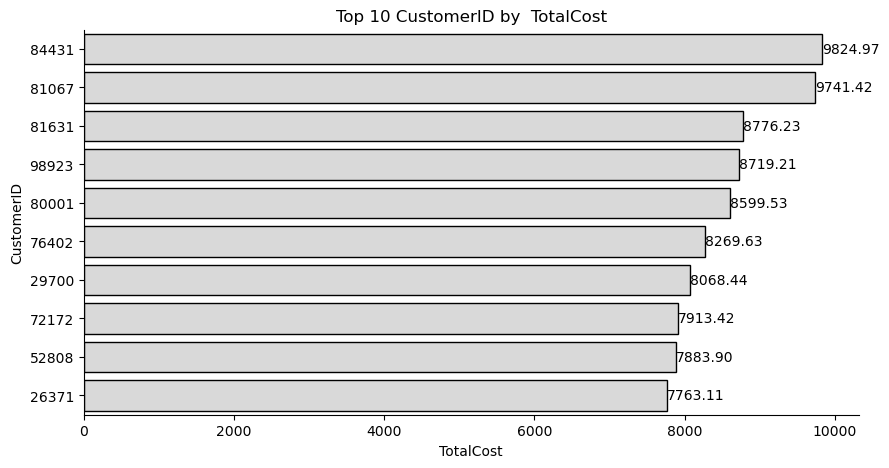

In [229]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=top_10_customer_id,y="CustomerID",x="TotalCost")
for p in ax.patches:
        p.set_color('#D9D9D9')  
        p.set_linewidth(1)      
        p.set_edgecolor('black') 
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
plt.title("Top 10 CustomerID by  TotalCost")
for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-0:.2f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

In [230]:
# List of invoice number of Customer IDs in the Top 10 List
customer_ids = ['84431', '81067', '81631', '98923', '80001', '76402', '29700', '72172', '52808', '26371']

# Filter these CustomerIDs and count them with value_counts
top_10_Invoice_count = pd.DataFrame(df[df["CustomerID"].isin(customer_ids)]["CustomerID"].value_counts()).reset_index()
top_10_Invoice_count

,CustomerID,count
0,81631,5
1,76402,4
2,80001,4
3,72172,3
4,81067,3
5,52808,3
6,98923,3
7,26371,3
8,84431,3
9,29700,2


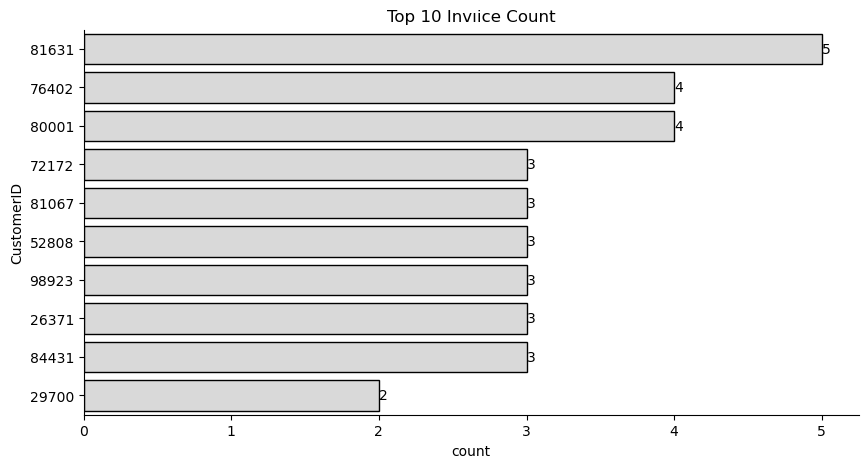

In [231]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=top_10_Invoice_count,y="CustomerID",x="count")
plt.title("Top 10 Invıice Count")
for p in ax.patches:
        p.set_color('#D9D9D9')  
        p.set_linewidth(1)      
        p.set_edgecolor('black') 
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-0:.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

### 6.14 Top 10 Product

In [232]:
product_count=df.groupby("Description")["Quantity"].sum().sort_values(ascending=False)
product_count

Description
USB Cable         113136
Wall Clock        112210
White Mug         111862
Backpack          111267
Desk Lamp         111006
Blue Pen          110113
Office Chair      109938
Headphones        109855
Wireless Mouse    109718
T-shirt           108622
Notebook          108197
Name: Quantity, dtype: int64

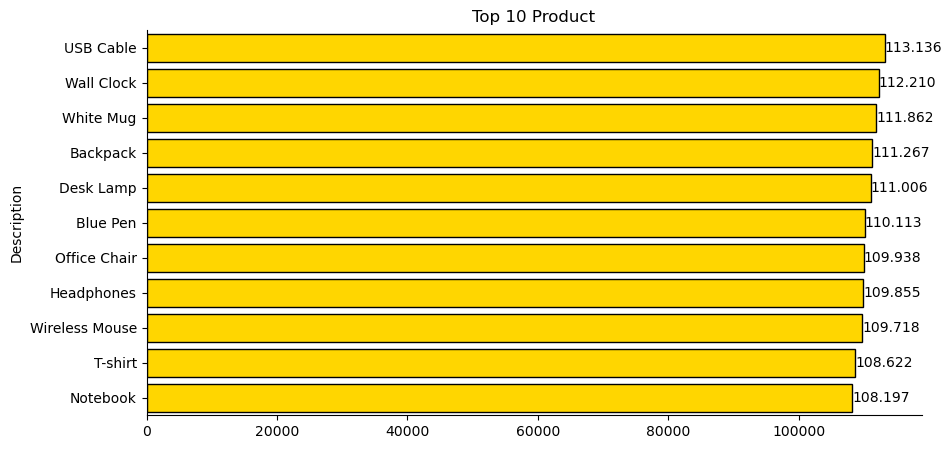

In [233]:
plt.figure(figsize=(10,5))
ax=sns.barplot(
    x=product_count.values,
    y=product_count.index,
    color="#FFD600"
              );
plt.title("Top 10 Product")
for p in ax.patches:
        p.set_color('#FFD600')  
        p.set_linewidth(1)     
        p.set_edgecolor('black') 
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-3:.3f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

In [234]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,TotalCost,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceTime,InvoiceSeason
0,221958,1964,White Mug,38,1.71,37039,Australia,0.47,Bank Transfer,10.79,Accessory,In-store,Not Returned,UPS,London,Medium,45.23,2020,1,1,00:00:00,Winter
1,771155,1241,White Mug,18,41.25,19144,Spain,0.19,Paypall,9.51,Accessory,Online,Not Returned,UPS,Rome,Medium,610.93,2020,1,1,01:00:00,Winter
2,231932,1501,Headphones,49,29.11,50472,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High,950.18,2020,1,1,02:00:00,Winter
3,465838,1760,Desk Lamp,14,76.68,96586,Netherlands,0.14,Paypall,11.08,Accessory,Online,Not Returned,Royal Mail,Rome,Low,934.31,2020,1,1,03:00:00,Winter
5,744167,1006,Office Chair,47,70.16,53887,Sweden,0.48,Credit Card,13.98,Furniture,Online,Not Returned,DHL,London,Medium,1728.69,2020,1,1,05:00:00,Winter


## Step 7: Conclusion


- Summarize insights from your data analysis.
- Identify opportunities for improvement based on customer spending, product performance, and return rates.
